In [ ]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

"""
Для примера разведочного анализа был выбран датасет титаника, который можно найти по ссылке ниже
"""

# фетчинг датасета титаника
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
content = requests.get(url, verify=False).content
df = pd.read_csv(io.StringIO(content.decode("utf-8")))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Размер датасета: (891, 15)

Пропуски до чистки:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Описание числовых признаков:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000


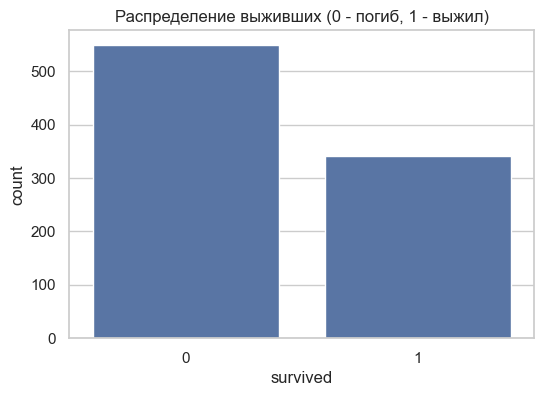

In [4]:
print(f"Размер датасета: {df.shape}")

print("\nПропуски до чистки:")
print(df.isnull().sum())

print("\nОписание числовых признаков:")
print(df.describe())

print("\nПример данных:")
print(df.head())
print(df.isnull().sum())


df_clean = df.drop(
    columns=["deck", "embark_town", "alive", "who", "adult_male", "class"]
)

df_clean["age"] = df_clean["age"].fillna(df_clean["age"].median())
mode_embarked = df_clean["embarked"].mode()[0]
df_clean["embarked"] = df_clean["embarked"].fillna(mode_embarked)

print("\nПропуски после чистки:")
print(df_clean.isnull().sum())


sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=df_clean)
plt.title("Распределение выживших (0 - погиб, 1 - выжил)")
plt.show()

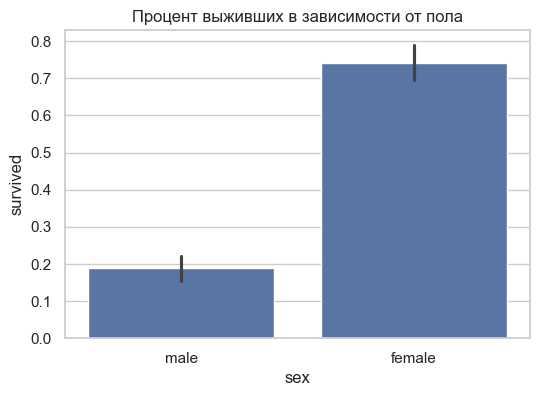

In [ ]:
# влияние пола навыживаемость
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="survived", data=df_clean)
plt.title("Процент выживших в зависимости от пола")
plt.show()

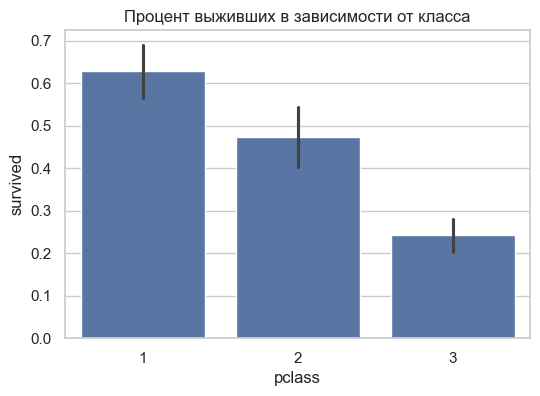

In [ ]:
# влияние класса на выживаемость
plt.figure(figsize=(6, 4))
sns.barplot(x="pclass", y="survived", data=df_clean)
plt.title("Процент выживших в зависимости от класса")
plt.show()

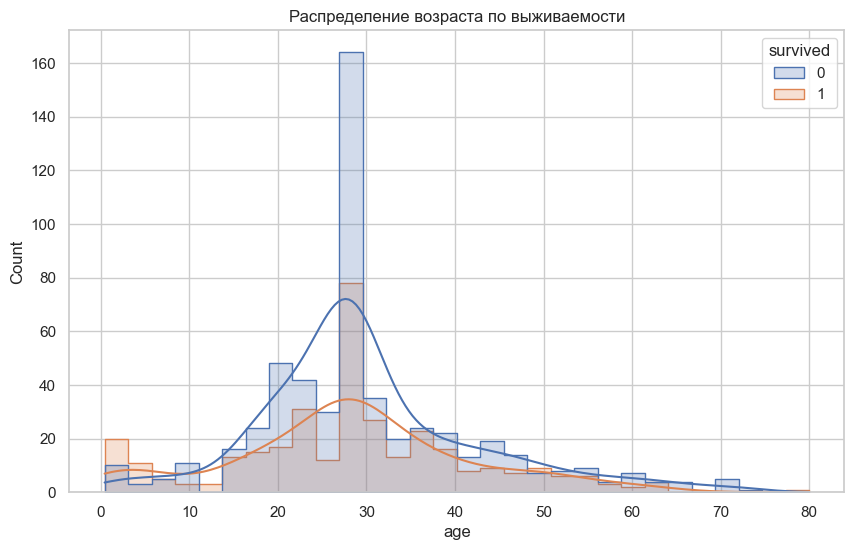

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x="age", hue="survived", kde=True, element="step")
plt.title("Распределение возраста по выживаемости")
plt.show()

Text(0.5, 1.0, 'Матрица корреляции')

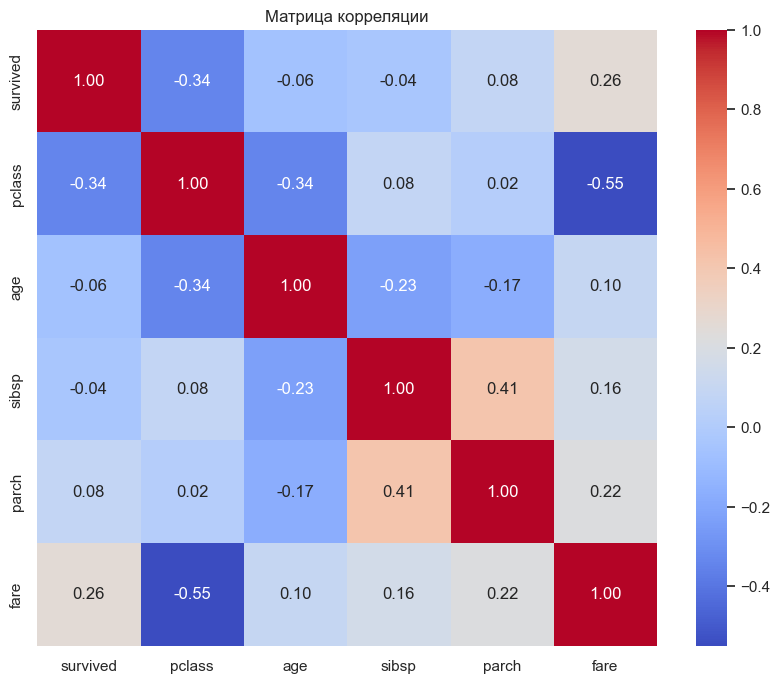

In [8]:
# маатрица корреляции
plt.figure(figsize=(10, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции")

In [ ]:
# создаем новый признак FamilySize (Размер семьи)
# одиночки или слишком большие семьи погибали чаще
df_clean["FamilySize"] = df_clean["sibsp"] + df_clean["parch"] + 1

# Преобразуем категориальный пол в числовой
df_clean["sex_encoded"] = df_clean["sex"].map({"female": 1, "male": 0})


df_final = pd.get_dummies(
    df_clean, columns=["embarked"], prefix="embarked", drop_first=True
)

df_final = df_final.drop(columns=["sex"])

print("Итоговый датасет для обучения:")
print(df_final.head())

plt.show()

Итоговый датасет для обучения:
   survived  pclass   age  sibsp  parch     fare  alone  FamilySize  \
0         0       3  22.0      1      0   7.2500  False           2   
1         1       1  38.0      1      0  71.2833  False           2   
2         1       3  26.0      0      0   7.9250   True           1   
3         1       1  35.0      1      0  53.1000  False           2   
4         0       3  35.0      0      0   8.0500   True           1   

   sex_encoded  embarked_Q  embarked_S  
0            0       False        True  
1            1       False       False  
2            1       False        True  
3            1       False        True  
4            0       False        True  
